<a href="https://colab.research.google.com/github/eng-akash/MachineLearning/blob/main/uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Saving uber.csv to uber (1).csv


In [27]:
df = pd.read_csv('uber.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [28]:
df.isnull()


df.drop(columns=["Unnamed: 0", "key"], inplace=True)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.isnull().sum()

In [29]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [30]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)
print(df)



df = df.drop(["pickup_datetime"], axis =1)
print(df)

        fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -

In [31]:
from math import *

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1

        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return  travel_dist

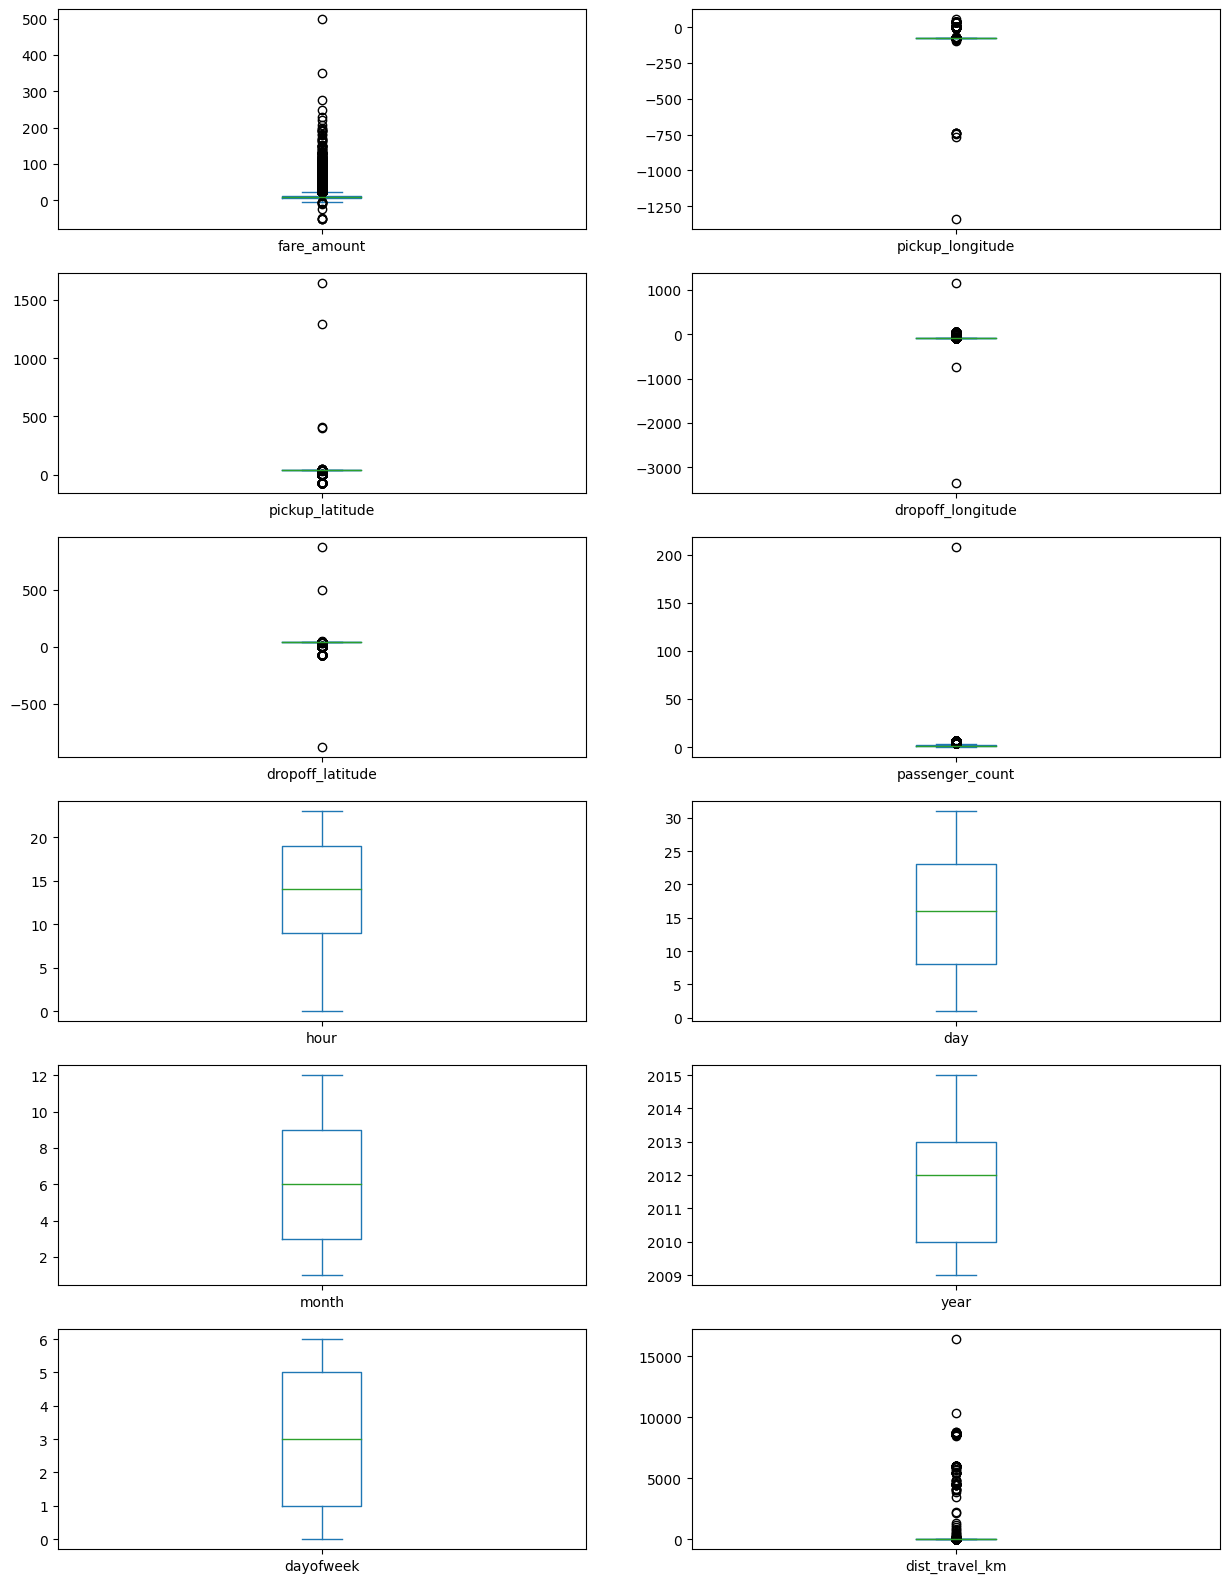

In [32]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

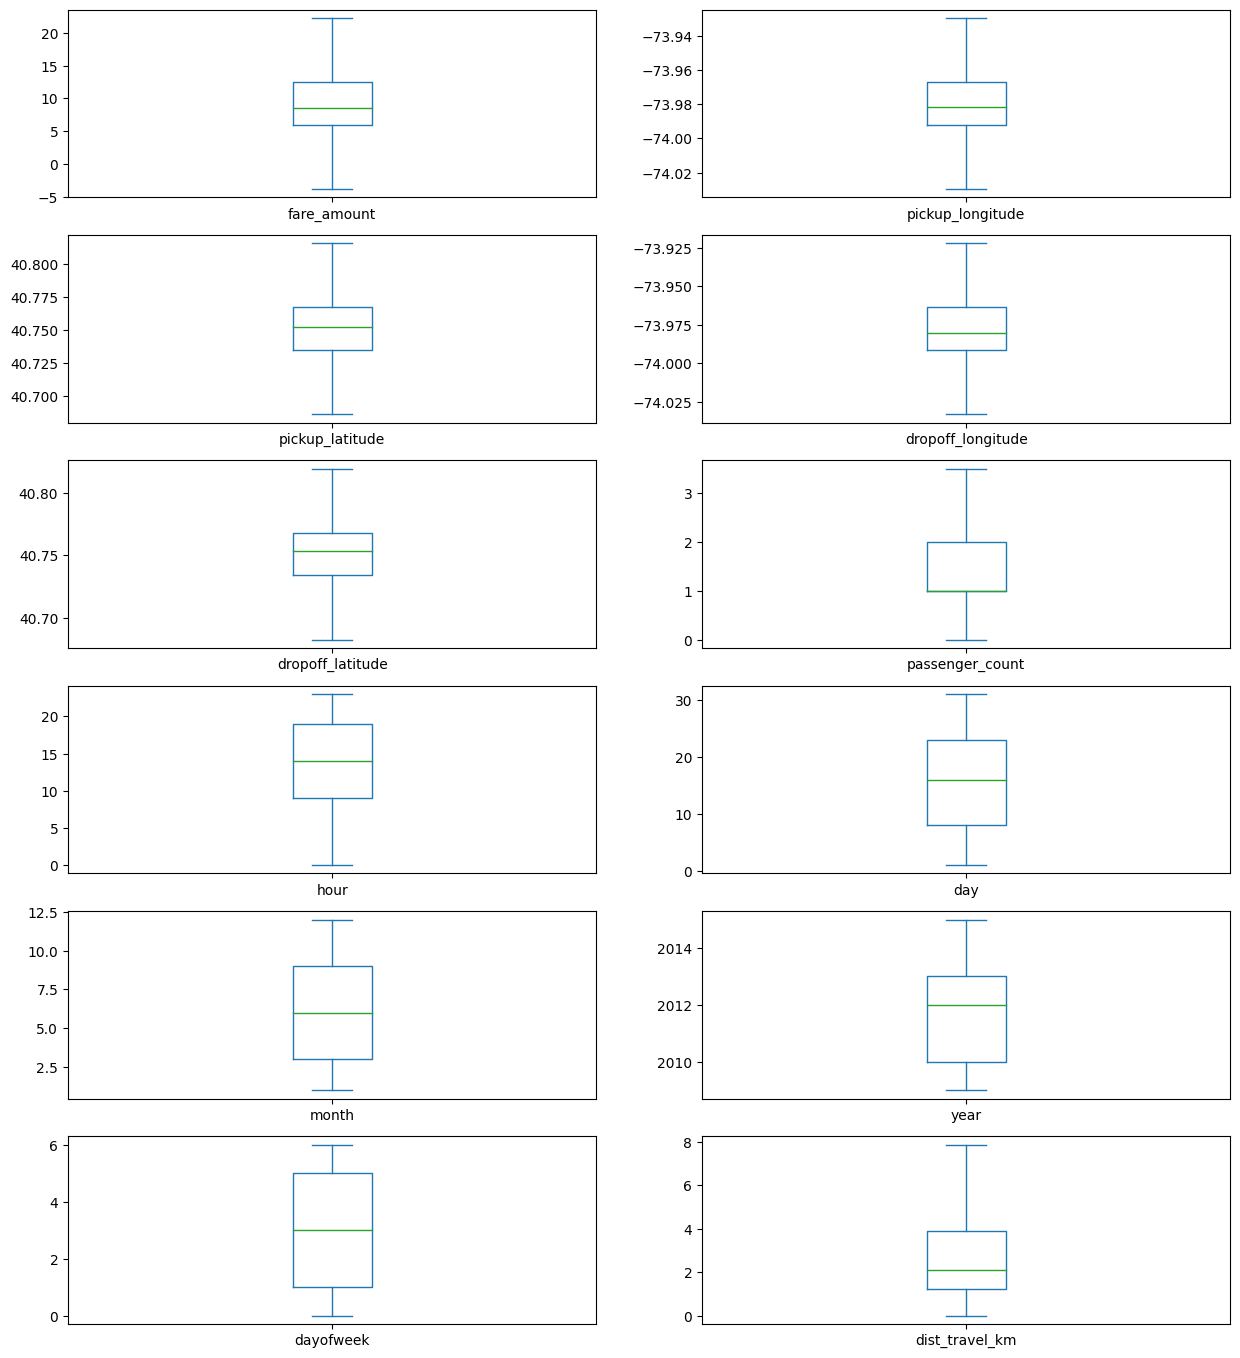

In [33]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
df = treat_outliers_all(df , df.iloc[: , 0::])
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [34]:
from sklearn.model_selection import train_test_split


df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y = df['fare_amount']
# Dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=500)



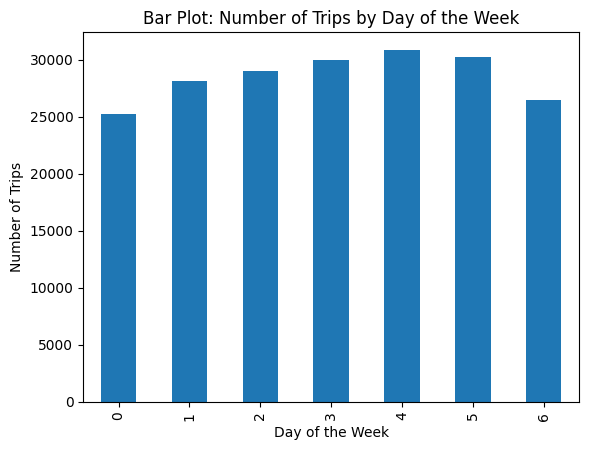

In [35]:
trips_by_day = df['dayofweek'].value_counts().sort_index()
trips_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Bar Plot: Number of Trips by Day of the Week')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
regressor = LinearRegression()

# Train the model with our training data
regressor.fit(x_train, y_train)
LinearRegression()
y_pred = regressor.predict(x_test)

from sklearn import metrics
from sklearn.metrics import r2_score

regressor_mse = metrics.mean_squared_error(y_test, y_pred)
regressor_mae= metrics.mean_absolute_error(y_test, y_pred)
regressor_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
regressor_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", regressor_mse)
print("Mean Absolute Error:", regressor_mae)
print("Root Mean Squared Error:", regressor_RMSE)
print("R-squared:", regressor_squared)

Mean Squared Error: 7.351246108077182
Mean Absolute Error: 1.805266430018366
Root Mean Squared Error: 2.711318149549621
R-squared: 0.7517689439442305
